<a href="https://colab.research.google.com/github/Chandrakanta-Rajput/CODING-SAMURAI-INTERNSHIP-TASK/blob/main/handwrittendigitrecognitionusingmnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training samples: (60000, 28, 28), Test samples: (10000, 28, 28)


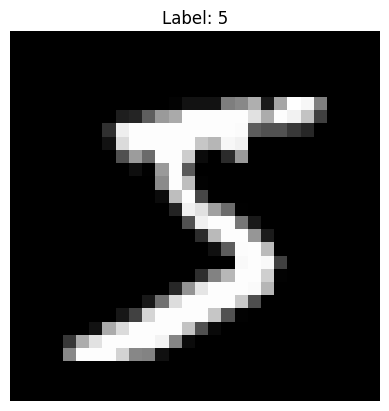

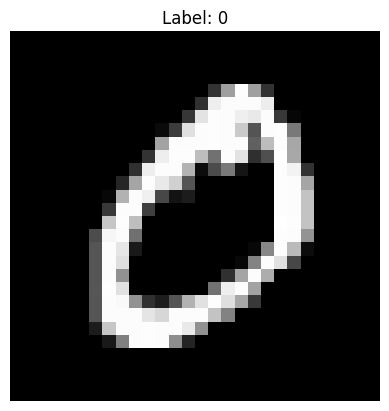

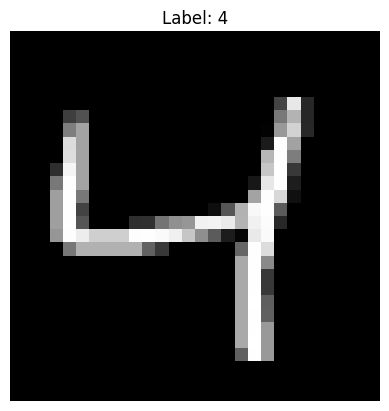

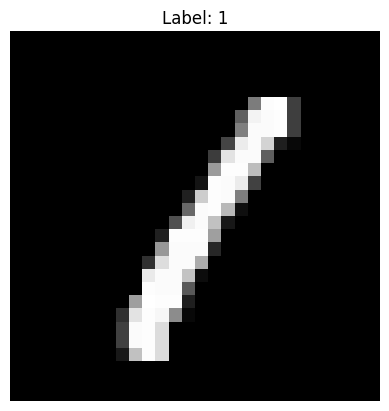

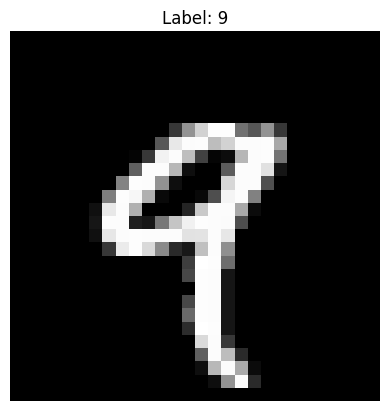

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8670 - loss: 0.4559 - val_accuracy: 0.9604 - val_loss: 0.1381
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9647 - loss: 0.1195 - val_accuracy: 0.9682 - val_loss: 0.1070
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9763 - loss: 0.0791 - val_accuracy: 0.9653 - val_loss: 0.1238
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9821 - loss: 0.0568 - val_accuracy: 0.9703 - val_loss: 0.1054
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9869 - loss: 0.0429 - val_accuracy: 0.9728 - val_loss: 0.0930
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9703 - loss: 0.0961

✅ Test Accuracy: 0.9746


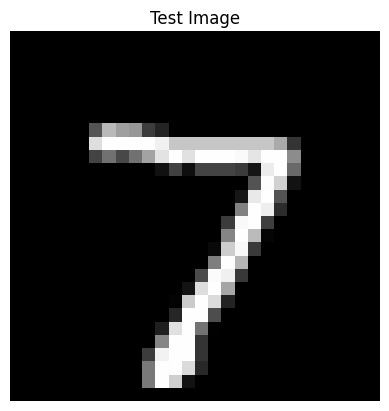

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
🔍 Predicted Digit: 7


In [ ]:
# Step 1: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Step 2: Load Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Step 3: Explore Dataset
print(f"Training samples: {x_train.shape}, Test samples: {x_test.shape}")

# Visualize first 5 digits
for i in range(5):
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
    plt.show()

# Step 4: Preprocess the Data
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encoding the labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Step 5: Build the Neural Network
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Step 6: Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 7: Train the Model
model.fit(x_train, y_train_cat, epochs=5, batch_size=32, validation_split=0.2)

# Step 8: Evaluate the Model
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

# Step 9: Predict on a Sample Image
index = 0
plt.imshow(x_test[index], cmap='gray')
plt.axis('off')
plt.title("Test Image")
plt.show()

prediction = model.predict(np.expand_dims(x_test[index], axis=0))
print(f"🔍 Predicted Digit: {np.argmax(prediction)}")
